<a href="https://colab.research.google.com/github/JANG-hyeonjun/biomedical_deeplearning/blob/main/lab02_201602955_%EC%9E%A5%ED%98%84%EC%A4%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3.2linear-regression-scratch

## 3.2.1generating the Dataset

In [1]:
!pip install -U mxnet-cu101==1.7.0
!pip install d2l==0.16.2

     |███████████████████████████████▌| 834.1MB 1.4MB/s eta 0:00:09tcmalloc: large alloc 1147494400 bytes == 0x55d958e20000 @  0x7f403b293615 0x55d91f70806c 0x55d91f7e7eba 0x55d91f70ae8d 0x55d91f7fc99d 0x55d91f77efe9 0x55d91f779b0e 0x55d91f70c77a 0x55d91f77ee50 0x55d91f779b0e 0x55d91f70c77a 0x55d91f77b86a 0x55d91f7fd7c6 0x55d91f77aee2 0x55d91f7fd7c6 0x55d91f77aee2 0x55d91f7fd7c6 0x55d91f77aee2 0x55d91f7fd7c6 0x55d91f77aee2 0x55d91f70c69a 0x55d91f77ac9e 0x55d91f779e0d 0x55d91f70c77a 0x55d91f77aa45 0x55d91f70c69a 0x55d91f77aa45 0x55d91f779b0e 0x55d91f70c77a 0x55d91f77b86a 0x55d91f779b0e
     |████████████████████████████████| 846.0MB 19kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 81kB 3.3MB/s 


In [2]:
%matplotlib inline 
import random
import torch
from d2l import torch as d2l

In [3]:
def synthetic_data(w,b,num_examples):
    X = torch.normal(0,1,(num_examples,len(w)))
    print(w.shape)
    print(X.shape)
    y = torch.matmul(X,w) + b
    print(len(y))
    print(y.shape)
    y += torch.normal(0,0.01,y.shape)
    print(y.shape)
    print('\n')
    print(len(y))
    return X,y.reshape((-1,1))


In [4]:
true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = synthetic_data(true_w,true_b,1000)
# 기본적으로 height witdth chanel
# torch batchszie chanel height width

torch.Size([2])
torch.Size([1000, 2])
1000
torch.Size([1000])
torch.Size([1000])


1000


2 by 1 w 와 4.2 bias를 만들고 synthetic_data를 이용해 features와 label을 만든다. 결과적으로 features 는 1000  by 2가 만들어지고 labels는 1000 by 1이 만들어진다. 

In [5]:
print(features.shape)
print(labels.shape)
print(len(features))

torch.Size([1000, 2])
torch.Size([1000, 1])
1000


In [6]:
print('features:',features[0],'\nlabel:',labels[0])

features: tensor([1.0158, 1.0291]) 
label: tensor([2.7283])


In [7]:
print(features)

tensor([[ 1.0158,  1.0291],
        [-1.9910,  0.5067],
        [-0.3145, -0.5532],
        ...,
        [-0.4004, -0.5616],
        [ 0.1628,  0.1326],
        [-0.3565,  1.4210]])


In [8]:
print(features[:,(0)])

tensor([ 1.0158e+00, -1.9910e+00, -3.1454e-01,  5.2338e-01, -9.9594e-01,
        -2.8927e-01,  9.9374e-01,  1.3213e+00,  1.0964e+00, -3.1824e-01,
        -6.0041e-01, -8.7041e-01,  2.0756e-01, -2.2613e-01,  1.4225e+00,
         9.6025e-01, -7.2019e-01, -1.1616e+00, -4.0205e-01,  7.8920e-01,
         1.5316e-01,  5.9846e-01, -3.7578e-02, -3.3004e-01, -8.0942e-01,
         1.3865e+00, -2.2885e-01,  1.2243e-01, -5.8377e-02, -8.8304e-01,
         3.5867e-01, -2.8663e-01, -7.6076e-01,  8.5244e-01,  9.2793e-01,
        -4.2649e-01,  1.0373e+00,  1.5789e+00,  5.0445e-01,  9.5145e-01,
        -1.9939e+00,  2.6391e-01,  1.5797e+00,  1.0473e+00, -2.6367e-01,
         9.0667e-01,  1.5816e+00, -1.3709e-01, -4.0462e-01, -7.4675e-01,
        -1.2297e+00,  3.1372e-02,  8.9386e-01,  2.0161e-01,  1.2520e+00,
        -3.8042e-01,  1.6224e+00,  1.0448e+00, -3.3610e-01,  4.1227e-01,
        -8.7413e-01, -4.1324e-01,  1.1609e+00,  3.7749e-01, -2.0265e+00,
        -5.1423e-02,  1.3701e+00,  5.6823e-01,  4.0

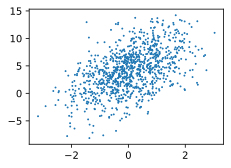

In [9]:
d2l.set_figsize()

d2l.plt.scatter(features[:,(0)].detach().numpy(),
                labels.detach().numpy(),1);

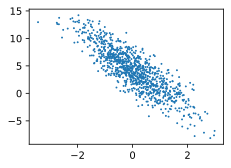

In [10]:
d2l.set_figsize()

d2l.plt.scatter(features[:,(1)].detach().numpy(),
                labels.detach().numpy(),1);

다음은 features와 label은 선형 관계를 나타내는것을 확인 할 수 있다. features[:(1)] 은 음의 상관관계를 가지고  features[:(0)] 은 양의 상관 간계를 가지는것을 확인 할 수 있다. 

## 3.2 Reading the Dataset

In [11]:
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    #print(indices)
    random.shuffle(indices)
    #print(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size,num_examples)])
        #print(len(batch_indices))
        yield features[batch_indices],labels[batch_indices]

num_example은 1000개의 숫자가 들어있고 리스트로 0~999 넘버링을한 주사위를 만들고  그것을 shuffle로 섞은 뒤 배치사이즈만큼 랜덤 추출을 만든 뒤 배치사이즈만큼 features와 label을 산출하는식으로 코딩이 진행된것을 알 수 있다. 

In [12]:
batch_size = 10

for X,y in data_iter(batch_size, features,labels):
    print(X,'\n',y)
    break

tensor([[ 1.9698,  1.4482],
        [ 1.3701,  0.0097],
        [-0.5761, -1.4191],
        [-0.6460,  0.9767],
        [ 1.4718,  0.7761],
        [-1.2583, -0.5808],
        [-0.5296,  0.2583],
        [-1.7147, -1.1244],
        [-0.2656,  0.1601],
        [ 0.8701, -0.3389]]) 
 tensor([[ 3.2294],
        [ 6.9071],
        [ 7.8647],
        [-0.3906],
        [ 4.5109],
        [ 3.6519],
        [ 2.2441],
        [ 4.5937],
        [ 3.1291],
        [ 7.0865]])


다음 결과는 batch_size 10개의 features와 labels를 출력한것을 확인 할 수 있다.  

## 3.2.3 initializing Model Parameters

In [13]:
w = torch.normal(0,0.01,size=(2,1), requires_grad = True)
b = torch.zeros(1,requires_grad=True)

In [14]:
print(w,b)

tensor([[-0.0183],
        [-0.0027]], requires_grad=True) tensor([0.], requires_grad=True)


model Parameters를 초기화하는 부분임을 알 수 있다.
X.shape 즉  batchsize 만큼 산출한 feature임을 확인 할 수 있다. 이와 행렬적인 연산이 가능해야하므로 w 를 2 by 1  으로 초기화한것을 알 수 있고 bias는 0으로 초기화 한것을 알 수 있다.

## 3.2.4 Defining the Model

In [15]:
print(X.shape)
print(w.shape)
print(y.shape)

torch.Size([10, 2])
torch.Size([2, 1])
torch.Size([10, 1])


In [16]:
def lineareg(X,w,b):
    return torch.matmul(X,w) + b

linear regression 함수를 python으로 바꾼것이며 
결국 이함수가 모델임을 알 수있고 우리는 이 모델의 w 와 b를 찾아야 함을 알 수 있다.

## 3.2.5 Defining the Loss Function

In [17]:
def squared_loss(y_hat,y):
    #print(y_hat.shape)
    #print(y.shape)
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

MSE Loss function 을 구현해 놓은것을 확인 할 수 있다.

## 3.2.6 Defining the Optimization Algorithm

In [18]:
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            #print('!')
            #print(param)
            param -= lr * param.grad / batch_size
            #print(param.grad)
            #print('!!!!!!!')
            param.grad.zero_() #trainer.zero_grad
            #print(param)

stochastic gradient descent 실제로 구현한부분이라 할 수 있으며 param이 실제로 찍어보면 true_w , true_b 에 가까워 짐을 알 수 있다. 

## 3.2.7 Training

In [19]:
lr = 0.03
num_epochs = 3
net = lineareg
loss = squared_loss

직접 hyper parameter을 정하는 부분임을 알 수 있다. 

In [20]:
print(features.shape)

torch.Size([1000, 2])


In [21]:
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b),y)
        l.sum().backward() #. loss.backward() 편미분이 여기서 완료
        #print(l.shape)
        #print(w.grad) 
        #print(b.grad) #그럼 기울기를 구할 수 있다. w,b에 대해 
        sgd([w,b],lr,batch_size) # .step 구해진 w,b를 이용해 구해진 기울기 바탕으로 여기서 w,b를 업데이트 한다. 
    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        print(f'epoch{epoch + 1},loss{float(train_l.mean()):f}') 


epoch1,loss0.044324
epoch2,loss0.000186
epoch3,loss0.000052


In [22]:

print(true_w,true_b)
print(w)
print(b)

tensor([ 2.0000, -3.4000]) 4.2
tensor([[ 2.0000],
        [-3.3997]], requires_grad=True)
tensor([4.1994], requires_grad=True)


In [23]:
print(f'error in estimating w: {true_w-w.reshape(true_w.shape)}')
print(f'error in estimating b:{true_b - b}')

error in estimating w: tensor([-1.4782e-05, -2.9683e-04], grad_fn=<SubBackward0>)
error in estimating b:tensor([0.0006], grad_fn=<RsubBackward1>)


실제로 epoch가 진행 할 수록 loss값이 줄어든것을 확인 할 수있으며 편미분의 backward를 sum을 통해하는 이유는 loss 안에 10개의 scalar값이 존재하기 때문이다. 그걸 합해준뒤 backward를 진행한다. 그런 뒤 sgd 함수에 조절되어야하는 w,b가 매개변수로 들어갈것이고 이미 backward에의해 미분된 식이 완성이 되었을 것이기 때문에 param.grad를 이용해 경사하강법을 진행하게 된다. 실제로 param을 찍어보면 값이 계속 true_w와 true_b에 가까워지는 것을 알 수있으며 
이는 train이 잘되고 있음을 알 수 있다. .grad 를해야 그변수에 의한 편미분식에서 값이 계산 되어지는것 같다.

# 3.3Concise Implementation of Linear Regression

## 3.3.1 Generating the Dataset

In [24]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = d2l.synthetic_data(true_w,true_b,1000)
print(features.shape)
print(labels.shape)

torch.Size([1000, 2])
torch.Size([1000, 1])


위의 3.2 과정에서 synthetic_data를 직접 구현했지만 
d2l의 모듈을 사용해 만든것을 확인 할 수 있다.

## 3.3.2 Reading the Dataset

In [25]:
def load_array(data_arrays,batch_size,is_train = True): #@save
    #print(*data_arrays)
    dataset = data.TensorDataset(*data_arrays)
    #print((dataset[0]))
    return data.DataLoader(dataset,batch_size,shuffle=is_train)

batch_size = 10
data_iter = load_array((features,labels),batch_size)

features 와 labels를 튜플로 묶은 뒤 그걸 dataset에다가 넣어 tenosr형태의 dataset을 만들어서 저장을 진행한다. 
그런뒤 epoch 마다 데이터셋을 섞어 데이터가 학습 되는 순서를 바꾸는 것을 진행하고 10으로 정해져있는 batch_size를 DataLoader에 넣어 줌으로써 배치사이즈만큼의 데이터셋을 받을 수 있다.

In [26]:
print(data_iter)

In [27]:
next(iter(data_iter))

[tensor([[-1.2558,  0.2252],
         [-1.6773,  0.3883],
         [ 0.4006, -0.1821],
         [-0.6203,  1.5221],
         [ 0.3653,  1.3490],
         [-0.7598,  0.7213],
         [-1.4136, -0.0380],
         [ 0.2187, -0.0549],
         [-0.6848,  1.0548],
         [-1.3667, -0.5793]]), tensor([[ 0.9178],
         [-0.4659],
         [ 5.6255],
         [-2.1963],
         [ 0.3141],
         [ 0.2402],
         [ 1.5054],
         [ 4.8197],
         [-0.7394],
         [ 3.4349]])]

In [28]:
next(iter(data_iter))

[tensor([[ 1.6076,  0.2327],
         [-0.6656, -0.6326],
         [-1.7486, -0.0425],
         [ 0.0522,  0.2262],
         [-0.1287,  0.0407],
         [-0.6616,  0.9477],
         [-0.9755,  0.3293],
         [-0.3635,  0.6665],
         [-1.1710,  0.2629],
         [-1.4429, -0.8704]]), tensor([[ 6.6249],
         [ 5.0335],
         [ 0.8485],
         [ 3.5342],
         [ 3.8009],
         [-0.3500],
         [ 1.1264],
         [ 1.2212],
         [ 0.9746],
         [ 4.2924]])]

next(iter(객체)) 를 사용하면  버전에 관계없이 출력을 할 수 있으며 만약 더이상 가져올 next 가 없다면 stop iteration을 발생 시킨다. 결과적으로 배치사이즈만큼 데이터를 가져온것을 확인 할 수 있다.

##3.3.3 Defining the Model

In [29]:
from torch import nn

net = nn.Sequential(nn.Linear(2,1))

In [30]:
print(net)
print(net[0].weight.data)
print(net[0].bias.data)

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
)
tensor([[0.3075, 0.4476]])
tensor([0.3352])


 model 의 정보를 찍어 본 결과 input features 2개 out features 가 1개인 방정식이자 함수 즉 모델이 완성 되었음을 알 수 있다. 

## 3.3.4 Initializing Model Parameters

In [31]:
print(net[0].weight.data.normal_(0,0.01))
net[0].bias.data.fill_(0)

tensor([[ 0.0124, -0.0094]])


tensor([0.])

위에서 모델을 완성 했으므로 w 와 b 를 초기화 해준다. w는 평균 0 표준 0.01의 정규분포를 이용해 초기화 
bias는  0으로 초기화를 진행해준다.  

## 3.3.5 Defining the Loss Function

In [32]:
loss = nn.MSELoss()

pytorch안에 있는 MSELoss를 사용한것을 알 수 있다. 


## 3.3.6 Defining the Optimization Alogrithm

In [33]:
print(net.parameters)

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
)>


In [34]:
trainer = torch.optim.SGD(net.parameters(),lr=0.03)

 net parameters에는 2 by 1의 weight 와 bias가 들어가 있고 learning rate 0.3 이 torch에 내장되어있는 optim.SGD에 들어가서 경사하강을 하는 모듈을 만들어주게 된다.

## 3.3.7  Training

In [35]:
num_epochs = 7
for epoch in range(num_epochs):
    for X,y in data_iter:
        l = loss(net(X),y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features),labels)
    print(f'epoch{epoch + 1},loss{l:f}')

epoch1,loss0.000274
epoch2,loss0.000110
epoch3,loss0.000110
epoch4,loss0.000109
epoch5,loss0.000110
epoch6,loss0.000110
epoch7,loss0.000110


결국 batch_size만큼 data 가져오고 loss 값 계산하고 loss를 편미분을 진행하고 .step 과정에서 계산된 편미분 식안에 w,b에대한 기울기값을 계산하고 그 게산된 값을 통해 parameter를 업데이트 하는 식을 통해서 w,b가 수정되어감을 알 수
있다.

In [36]:
w = net[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('error in estimating b:',true_b-b)

error in estimating w: tensor([0.0007, 0.0009])
error in estimating b: tensor([6.5804e-05])


# 3.6 Implementation of Softmax Regression from scratch

In [37]:
import torch 
from IPython import display
from d2l import torch as d2l

In [38]:
batch_size = 256
train_iter,test_iter = d2l.load_data_fashion_mnist(batch_size)


Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw




Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw




Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw




Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw

Processing...


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


fashion mnist data에 대해서 배치사이즈만큼 data를 가져와 train_iter와 test_iter에 넣게 된다.

In [39]:
#print(type(train_iter))
#print(test_iter)

## 3.6.1 Initializing Model Parameters

In [40]:
num_inputs = 784
num_outputs = 10

W = torch.normal(0,0.01,size=(num_inputs,num_outputs), requires_grad = True)
b = torch.zeros(num_outputs,requires_grad=True)

W 는 784 by 10의 크기의 tensor로 initializing 되고 10개 크기를 가진 bias가 initializing 됨을 알 수 있다.

## 3.6.2 Defining the Softmax Operation

In [41]:
X = torch.tensor([[1.0,2.0,3.0],[4.0,5.0,6.0]])
X.sum(0,keepdim=True) 
X.sum(1,keepdim=True)

tensor([[ 6.],
        [15.]])

In [42]:
def softmax(X):
    #print(X.shape)
    X_exp = torch.exp(X)
    #print(X_exp)
    partition = X_exp.sum(1,keepdim=True)
    return X_exp / partition

In [43]:
X = torch.normal(0,1,(2,5))
X_prob = softmax(X)
print(X_prob.shape)
print(X_prob.sum(1).shape) # 2 by 1
X_prob,X_prob.sum(dim = 1)


torch.Size([2, 5])
torch.Size([2])


(tensor([[0.1629, 0.4734, 0.2198, 0.0996, 0.0443],
         [0.0251, 0.1270, 0.7545, 0.0830, 0.0103]]), tensor([1.0000, 1.0000]))

softmax에 대해 구현된것을 확인 할 수있고 정상적으로 잘 잘동작하는 것을 확인 할 수 있다.

## 3.6.3 Definging the Model

In [44]:
print(W.shape[0])
print(X)

784
tensor([[-0.5936,  0.4734, -0.2942, -1.0850, -1.8960],
        [-1.5607,  0.0616,  1.8431, -0.3637, -2.4495]])


In [45]:
def net(X):
    return softmax(torch.matmul(X.reshape((-1,W.shape[0])),W)+ b)

-1에 대한 고민을 해 보았는데 아무래도 이부분은 concise로 치면 Flatten을 가능하게 해주기도 할 수 있겠다라는 판단을 내렸다. 위에서 W.shape[0] 에 대해 직접 찍어보니 784가 나왔는데 이 784가 들어가게되면 reshape을해도 크기는 유지해 줘야 하므로 (1,784)로 모양이 유지 될것이다.
그러면 (1,784) * (784,10) 이되므로 10가지 class를 구분시켜주는 모델이 완성됨을 추측할 수 있다.라는것이 나의 판단이다.

## 3.6.4 Defining the Loss Function

In [46]:
y = torch.tensor([0,2])
y_hat = torch.tensor([[0.1,0.3,0.6],[0.3,0.2,0.5]])
#print(y_hat[[0,1],[0,1]])
#print(y_hat[[0,1],[0,2]])
#print(y_hat[[0,1],])
y_hat[[0,1] ,y]

tensor([0.1000, 0.5000])

y_hat 이 아무래도 0.1 과 0.5가 나온이유는 0,0 과 1,2를 받았기 때문이다. 이는 정답이 첫번째 클래스의 예제를 준곳에서 첫번째가 정답이고 두번째 클래스의 예제 3번째 클래스가 맞는것임을 알 수 있다.

In [47]:
y_hat[range(len(y_hat)),y]

tensor([0.1000, 0.5000])

In [48]:
range(len(y_hat))

range(0, 2)

In [49]:
print(y_hat)

tensor([[0.1000, 0.3000, 0.6000],
        [0.3000, 0.2000, 0.5000]])


In [50]:
print(y)

tensor([0, 2])


In [51]:
def cross_entropy(y_hat,y):
    return -torch.log(y_hat[range(len(y_hat)),y])

cross_entropy(y_hat,y)

tensor([2.3026, 0.6931])

위에서 구한0.1 과 0.5를 밑이 e인  ln에 넣음으로써 loss값을 계산하는것을 확인 할 수 있다.

## 3.6.5 Classification Accuracy

In [52]:
def accuracy(y_hat,y):
   # print(y_hat.shape)
   # print(len(y_hat.shape))
   # print(y_hat.shape[1])
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1: #y_hat.shape -> 행 y_hat.shape[1] -> 열  
        y_hat = y_hat.argmax(axis=1)
        #print(y_hat)
    cmp = y_hat.type(y.dtype) == y
   # print(y_hat.type(y.dtype))
   # print(y)
   # print(cmp)
   # print(float(cmp.type(y.dtype).sum()))
    return float(cmp.type(y.dtype).sum())

In [53]:
#print(accuracy(y_hat,y))
accuracy(y_hat,y) / len(y)

0.5

print를 찍어봄으써 확인을 해보니 y_hat = y_hat.argmax(axis=1) 에서 예측하는 값이 가장큰 값의 인덱스를 저장하게 된다. 그러면 그것을 정답이라 볼 수 있는 y와 비교를 진행하고 그것을 cmp에저장하면 cmp는 boolean값을 가지게 되는데 이를 더함으로써 돌려주게 된다. 그러면 false =0 true=1의 값을 가지니까 정답을 몇개 맞췄는지 파악할 수 있는 코드임을 알 수있다.

In [54]:
def evaluate_accuracy(net,data_iter):
    if isinstance(net,torch.nn.Module):
        net.eval()
    metric = Accmulator(2)
    for X,y in data_iter:
        print(X.shape)
        print(y.shape)
        print(y.numel())
        metric.add(accuracy(net(X),y),y.numel())

    print(metric[0])
    print(metric[1])
    return metric[0] / metric[1]

In [55]:
class Accmulator:
    def __init__(self,n):
        self.data = [0.0] * n
    
    def add(self,*args):
        self.data = [a + float(b) for a,b in zip(self.data,args)]
    
    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self,idx):
        return self.data[idx]

In [56]:
evaluate_accuracy(net, test_iter)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
to

0.2069

어째서 X.shape이 256,1,28,28 을 출력하는가에대해 초점을 맞춰 보고 검색을 진행해본 결과 
tensor는 batch_size chanel height width를 base로 텐서를 구성한다는것을 파악했다.
그러면 위에서 언급했던 Flatten역할을 하는 부분에서 256가지의 예측을 줄것이고 이는 label과 함께 accuracy로 들어갈것이다. 그럼 맞는것 / 256 개씩 쌓이게 될것이고 이는 결국 맞는것/10000개 즉 모델의 정확도를 파악할 수 있다는것을 알 수 있다.  

## 3.6.6 training

In [57]:
def train_epoch_ch3(net, train_iter, loss, updater):  #@save
    """The training loop defined in Chapter 3."""
    # Set the model to training mode
    if isinstance(net, torch.nn.Module):
        net.train()
    # Sum of training loss, sum of training accuracy, no. of examples
    metric = Accmulator(3)
    for X, y in train_iter:
        # Compute gradients and update parameters
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # Using PyTorch in-built optimizer & loss criterion
            updater.zero_grad()
            l.backward()
            updater.step()
            metric.add(float(l) * len(y), accuracy(y_hat, y), y.numel())
        else:
            # Using custom built optimizer & loss criterion
            l.sum().backward()
            updater(X.shape[0])
            metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # Return training loss and training accuracy
    return metric[0] / metric[2], metric[1] / metric[2]

전반적으로 한 epoch애 관련된 코드 인걸 알 수 있다. 

net.train()은 모델을 학습모드로 바꾸는 것을 알 수 있고 그뒤 객체를 만들어낸다 이는 metric 인데 이것은 모델의 정확도 모델의 loss를 return해준다. 

그런 뒤 y_hat = net(X) 이부분에서 예측값을 받게된다. 

그러면 label이 되어있는 y와 함께 loss값을 구할것이다.

그 뒤 loss 편미분(l.backward()) 그리고 편미분한 식에 가중치에대한 편미분결과를 이용해 w,b를 업데이트한다.(updater.step()) 

그리고 256개에대한 loss 그리고 정확도를 앞서 만들어냈던 객체에 들어가게 된다. 

이러한 결과를 한번의 학습마다 돌려준다.  

In [58]:
class Animator:  #@save
    """For plotting data in animation."""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # Incrementally plot multiple lines
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes,]
        # Use a lambda function to capture arguments
        self.config_axes = lambda: d2l.set_axes(self.axes[
            0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # Add multiple data points into the figure
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [59]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  #@save
    """Train a model (defined in Chapter 3)."""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

전반적으로 train_ch3의 과정을 이해해보면 아직 완벽하지는 않지만 animator에는 x축은 epoch y축은 0.3 ~0.9의 범위를 가지는 animator가만들어지고 아래에서 넘어온 epoch 10번만큼 학습을 시작하게 된다. 

그러면 한번의 학습이 진행이 될것이고 train_metrics의 첫번째 에는 loss 값이 들어있을것이고 두번째에는 모델의 train_accuracy의 값이 들어가 있다. 

뿐만아니라 모델의 정확도 또한 관측해야 할 것이므로 test_acc에 모델과 test_iter를 evaluate_accuracy에 넣어 값을 받게 된다. 

이렇게 받은 3개의 값을 animator에 1 epoch마다 시각화를 해주고 epoch이 전부 진행된뒤 assert를 통해 학습이 잘되고있는지를 검사하게 된다.    

In [60]:
lr = 0.1

def updater(batch_size):
    return d2l.sgd([W, b], lr, batch_size)

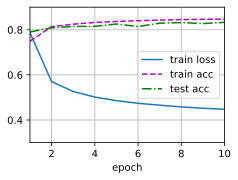

In [61]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

## 3.6.7 prediction

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


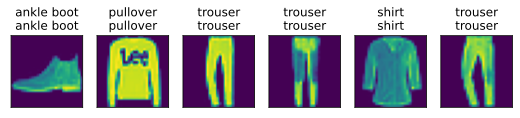

In [62]:
def predict_ch3(net, test_iter, n=6):  #@save
    """Predict labels (defined in Chapter 3)."""
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true + '\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)

# 3.7 Concise Implementation of Softmax Regression

In [63]:
import torch
from torch import nn
from d2l import torch as d2l

In [64]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.utils.data.loader에 상속된 DataLoader를 이용해 train_iter 와 test_iter를 배치 사이즈를 기준으로 만들어 내는 과정이라고 볼 수 있다.

In [65]:
print(type(train_iter))

<class 'torch.utils.data.dataloader.DataLoader'>


## 3.7.1 initializing Model parameters

In [66]:
net = nn.Sequential(nn.Flatten(),nn.Linear(784,10))

In [67]:
def init_weights(m):
    print(type(m))
    print('!!!!!!')
    print(nn.Linear)
    if type(m) == nn.Linear:
        print(m.weight.shape)
        nn.init.normal_(m.weight,std = 0.01)

net.apply(init_weights)

<class 'torch.nn.modules.flatten.Flatten'>
!!!!!!
<class 'torch.nn.modules.linear.Linear'>
<class 'torch.nn.modules.linear.Linear'>
!!!!!!
<class 'torch.nn.modules.linear.Linear'>
torch.Size([10, 784])
<class 'torch.nn.modules.container.Sequential'>
!!!!!!
<class 'torch.nn.modules.linear.Linear'>


Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

직접 함수 안에 있는 결과를 출력해보니 if(type(m))이란 것은 model 즉 net의 타입을 보고 그 타입이 input 784를 가지고 10개의 아웃풋을 가지는 layer를 발견한다면 그것의 가중치를 정규분포의 표준편차 0.01로 되어 있는곳에서 가져온 값으로 채운다. 

## 3.7.2 Softmax Implementation Revisited

In [68]:
loss = nn.CrossEntropyLoss()

pytorch에서 제공해주는 loss Cross Entropy loss를 사용하였다.

In [69]:
print(net.parameters)
print(net.parameters(1))
print(net[1].weight.data.shape)
print(net[1].bias.data.shape)

<bound method Module.parameters of Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)>
<generator object Module.parameters at 0x7fe7822be950>
torch.Size([10, 784])
torch.Size([10])


## 3.7.3 Optimization Algorithm

In [70]:
trainer = torch.optim.SGD(net.parameters(),lr=0.1)

여기서는 torch에서도 제공하고 concise Implementation linear regression에서 사용했던 stochastic gradient descent함수를 사용하고 learning rate를 0.3으로 설정했다.

## 3.7.4  Training

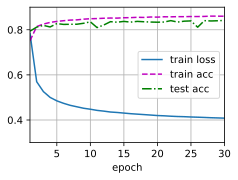

In [71]:
num_epochs = 30
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,trainer)

nn.Sequential 을 설정했던 net 
 
dataloader 를 이용해서 만들어냈던 train_iter,test_iter

torch 의 cross Entropy를 이용해 만들어 낸 loss

1번의 전체학습을 10번 반복하겠다고 설정한 num_ephochs

stochastic gradient descent 를 이용해 가중치를 업데이트할 trainner

이모든걸 train함수에 넣어 줌으로써 학습을 완성한것을 확인 할 수 있다.  

## 3.7.5 Prediction (간단하게 한줄로 실행시켜보았다.) 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


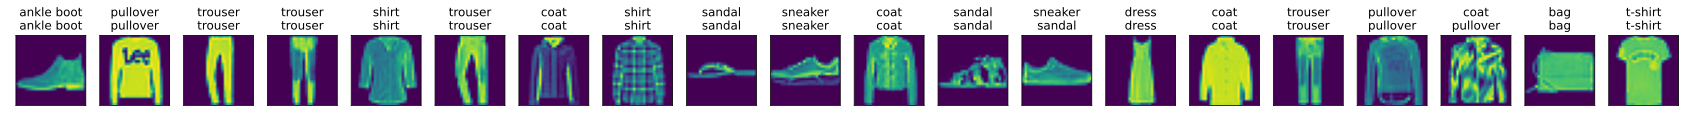

In [72]:
d2l.predict_ch3(net,test_iter,n=20)

다음은 epoch를 총 40번을 돌린 결과이다 확실이 모델의 정확도가 올라갔지만 어느 순간더이상 올라가지 않는 것을 확인 할 수 있다.